# Description

Here we make all of the plots that we need to combine the Dingo output with the Radio output.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import corner
import matplotlib.pyplot as plt
from dingo.gw.result import Result



# Plot corner plot for day_threshold "All"

In [5]:
def make_1_corner(samples, idx1, idx2, labels = params, true_values=None):
    """
    Make a 2D corner plot of the posterior between two parameters.

    Parameters:
    - samples: array of shape (n_samples, n_params)
    - idx1, idx2: indices of the two parameters to plot
    - labels: list of parameter names (optional)
    - true_values: list of true values for the parameters (optional)
    """
    sub_samples = samples[:, [idx1, idx2]]
    sub_labels = [labels[idx1], labels[idx2]] if labels else None
    sub_truths = [true_values[idx1], true_values[idx2]] if true_values is not None else None

    fig = corner.corner(
        sub_samples,
        labels=sub_labels,
        show_titles=True,
        title_fmt=".2f",
        quantiles=[0.025, 0.5, 0.975],
        title_kwargs={"fontsize": 12},
        label_kwargs={"fontsize": 14},
        plot_datapoints=True,
        fill_contours=True,
        levels=(0.68, 0.95),
        smooth=1.0,
        smooth1d=1.0,
        truths=sub_truths,
    )
    plt.tight_layout()
    # plt.savefig('./DingoPrior_posteriorFromAllRadioData_dl_thetaObs.png')
    plt.show()
    #plt.savefig('./DingoPrior_posteriorFromAllRadioData_dl_thetaObs.png')

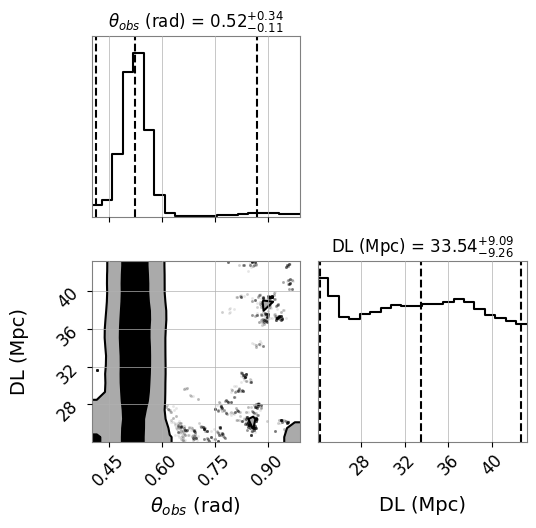

In [8]:
#open up the posteriors:

# samples_all_data = np.load('/u/parthpatel7173/MMA_RadioWave/FederatedFitting/examples/results/pf_8sites_distributed_dayAll/pf_8sites_distributed_dayAll_distributed_flat_samples.npy')
samples_all_data = np.load('./results/pf_8sites_distributed_dayAll_run12/pf_8sites_distributed_dayAll_run12_distributed_flat_samples.npy')

# params = ['log(E0)',r'$\theta_{obs}$ (rad)','thetaCore','log(n0)','log(eps_e)','log(eps_B)','p', 'thetaWing', 'DL (Mpc)']
params = ['log(E0)',r'$\theta_{obs}$ (rad)', 'log(n0)', 'DL (Mpc)']

make_1_corner(samples_all_data, 1,3, params)


# Plot corner plot for day_threshold "150"

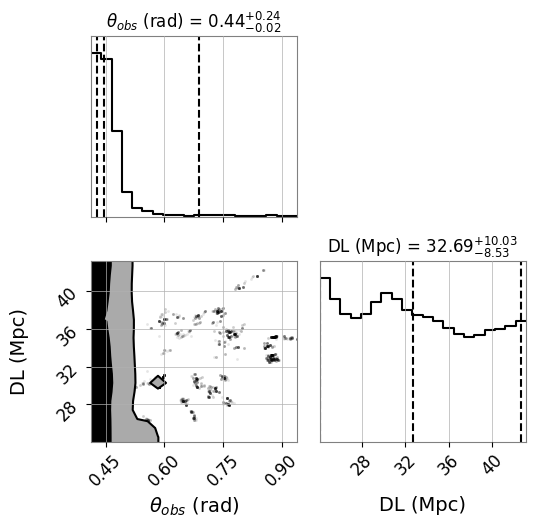

In [9]:
#open up the posteriors:

# samples_all_data = np.load('/u/parthpatel7173/MMA_RadioWave/FederatedFitting/examples/results/pf_8sites_distributed_dayAll/pf_8sites_distributed_dayAll_distributed_flat_samples.npy')
samples_all_data = np.load('./results/pf_8sites_distributed_day150_run3/pf_8sites_distributed_day150_run3_distributed_flat_samples.npy')

# params = ['log(E0)',r'$\theta_{obs}$ (rad)','thetaCore','log(n0)','log(eps_e)','log(eps_B)','p', 'thetaWing', 'DL (Mpc)']
params = ['log(E0)',r'$\theta_{obs}$ (rad)', 'log(n0)', 'DL (Mpc)']

make_1_corner(samples_all_data, 1,3, params)


# Plot corner plot for day_threshold "50"

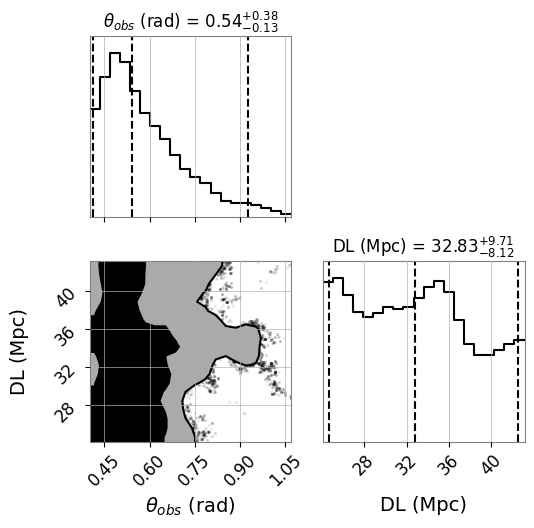

In [10]:
#open up the posteriors:

# samples_all_data = np.load('/u/parthpatel7173/MMA_RadioWave/FederatedFitting/examples/results/pf_8sites_distributed_dayAll/pf_8sites_distributed_dayAll_distributed_flat_samples.npy')
samples_all_data = np.load('./results/pf_8sites_distributed_day50_run3/pf_8sites_distributed_day50_run3_distributed_flat_samples.npy')

# params = ['log(E0)',r'$\theta_{obs}$ (rad)','thetaCore','log(n0)','log(eps_e)','log(eps_B)','p', 'thetaWing', 'DL (Mpc)']
params = ['log(E0)',r'$\theta_{obs}$ (rad)', 'log(n0)', 'DL (Mpc)']

make_1_corner(samples_all_data, 1,3, params)


# Plot corner plot for centralized data

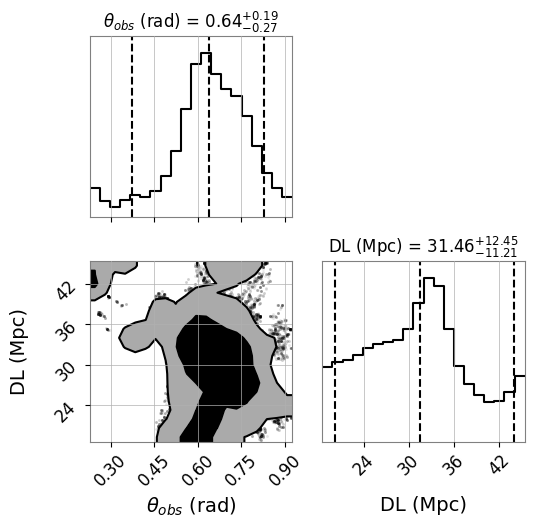

In [9]:

#open up the posteriors:

# samples_all_data = np.load('/u/parthpatel7173/MMA_RadioWave/FederatedFitting/examples/results/pf_8sites_distributed_day150/pf_8sites_distributed_day150_distributed_flat_samples.npy')
samples_all_data = np.load('./GW170817_thetaObs_fromDingo_run4_flat_samples.npy')

params = ['log(E0)',r'$\theta_{obs}$ (rad)','thetaCore','log(n0)','log(eps_e)','log(eps_B)','p', 'thetaWing', 'DL (Mpc)']

make_1_corner(samples_all_data, 1,8, params)


# Overlap corner plots for daythreshold "All"

Loading dataset from ./GW170817_data0_1187008882-42_importance_sampling.hdf5.
dingo shape:  (60000, 2)
Using importance sampling weights in plot.
fed shape:  (48000, 2)


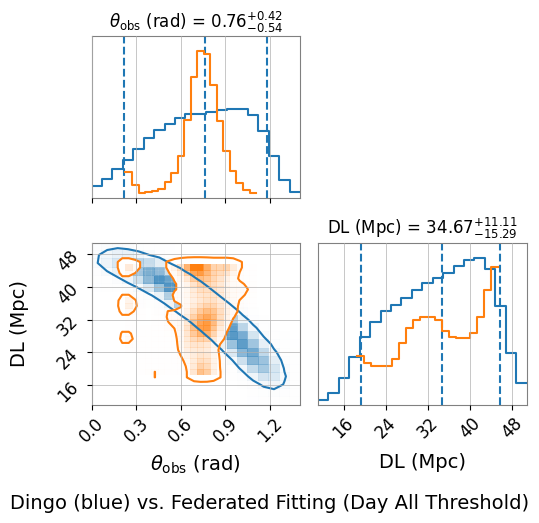

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from dingo.gw.result import Result

# === Load Dingo samples ===
# dingo_filepath = "/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/ParameterEstimation/examples/octopus/outdir/result/GW170817_data0_1187008882-42_importance_sampling.hdf5"
dingo_filepath = "./GW170817_data0_1187008882-42_importance_sampling.hdf5"

dingo_result = Result(file_name=dingo_filepath)  # Update this path
dingo_samples_df = pd.DataFrame(dingo_result.samples)

# Extract theta_jn and luminosity_distance from Dingo
param_names=["theta_jn", "luminosity_distance"]
samples_dingo = dingo_samples_df[param_names]

# Extract theta_jn and luminosity_distance
theta_jn = samples_dingo["theta_jn"].to_numpy()
luminosity_distance = samples_dingo["luminosity_distance"].to_numpy()

# Convert inclination angle to observation angle
theta_obs = np.pi - theta_jn  # Result is in radians

# Reconstruct samples with theta_obs and luminosity_distance
samples_obs = np.column_stack((theta_obs, luminosity_distance))

samples_dingo = pd.DataFrame(samples_obs, columns=["theta_obs", "luminosity_distance"])

print("dingo shape: ", samples_dingo.shape)


# Check and extract weights
weights = None
use_weights = True
if use_weights and "weights" in dingo_samples_df.columns:
    weights = dingo_samples_df["weights"].to_numpy()
    print("Using importance sampling weights in plot.")

# samples_dingo = samples_dingo[:48000]
# weights = weights[:48000]

# === Load Federated fitting samples ===
#open up the posteriors:

# pf_samples_filepath = '/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/FederatedFitting/examples/results/pf_8sites_distributed_day50/pf_8sites_distributed_day50_distributed_flat_samples.npy'
# pf_samples_filepath = './GW170817_thetaObs_fromDingo_run4_flat_samples.npy'
# pf_samples_filepath = './pf_8sites_distributed_dayAll_run2/pf_8sites_distributed_dayAll_distributed_flat_samples.npy'

pf_samples_filepath = './pf_8sites_distributed_dayAll_run10/pf_8sites_distributed_dayAll_run10_distributed_flat_samples.npy'

samples_all_data = np.load(pf_samples_filepath)  # Update this path

params = ['log(E0)',r'$\theta_{obs}$ (rad)','thetaCore','log(n0)','log(eps_e)','log(eps_B)','p', 'thetaWing', 'DL (Mpc)']
# Indices for theta_obs and DL in your federated samples
# Double-check these are the correct indices based on your `params` list
idx_theta_obs = 1  # "$\\theta_{obs}$ (rad)"
idx_dl = 8         # "DL (Mpc)"

# theta_fed = np.degrees(samples_all_data[:, idx_theta_obs])  # convert to degrees if needed
# dl_fed = samples_all_data[:, idx_dl]
# samples_fed = np.vstack([theta_fed, dl_fed]).T

# samples_fed = samples_all_data[0:20000, [idx_theta_obs, idx_dl]]
samples_fed = samples_all_data[:, [idx_theta_obs, idx_dl]]

#Convert obs to invlination angle
# samples_fed[:, 0] += np.pi  # Convert theta_obs to inclination angle

# Extract theta_obs and luminosity_distance columns
# theta_obs = samples_all_data[:, idx_theta_obs]
# luminosity_distance = samples_all_data[:, idx_dl]

# Convert theta_obs to inclination angle (in radians)
# inclination_angle = np.pi - theta_obs

# Combine inclination angle and luminosity_distance into a new array
# samples_fed = np.column_stack((inclination_angle, luminosity_distance))

print("fed shape: ", samples_fed.shape)

# === Plot both together ===
labels = [r"$\theta_{\rm obs}$ (rad)", "DL (Mpc)"]

fig = corner.corner(
    samples_dingo,
    labels=labels,
    weights=weights,
    show_titles=True,
    title_fmt=".2f",
    quantiles=[0.05, 0.5, 0.95],
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    plot_datapoints=False,
    fill_contours=False,
    levels=(0.90,),
    smooth=1.0,
    smooth1d=1.0,
    color='C0',
    # truths=sub_truths,
    contourf_kwargs={'alpha': 0},  # 👈 suppress fill completely
)

corner.corner(
    samples_fed,
    labels=labels,
    fig=fig,  # Use the existing figure
    plot_datapoints=False,
    fill_contours=False,
    levels=(0.90,),
    smooth=1.0,
    smooth1d=1.0,
    color='C1',
    contourf_kwargs={'alpha': 0},  # 👈 again, suppress fill
)

fig.suptitle(
    "Dingo (blue) vs. Federated Fitting (Day All Threshold)",
    fontsize=14,
    y=0.02  # Move title to bottom
)


plt.tight_layout()
# plt.savefig("comparison_dingo_vs_federated_theta_dl.png")
plt.show()


# Overlap corner plots for daythreshold "150"


Loading dataset from ./GW170817_data0_1187008882-42_importance_sampling.hdf5.
dingo shape:  (60000, 2)
Using importance sampling weights in plot.
fed shape:  (48000, 2)


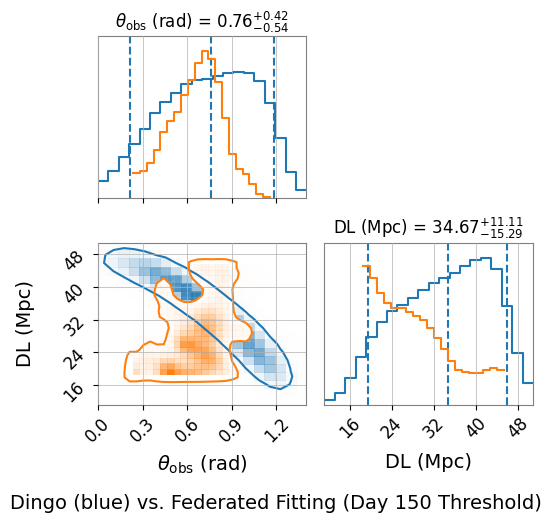

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from dingo.gw.result import Result

# === Load Dingo samples ===
# dingo_filepath = "/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/ParameterEstimation/examples/octopus/outdir/result/GW170817_data0_1187008882-42_importance_sampling.hdf5"
dingo_filepath = "./GW170817_data0_1187008882-42_importance_sampling.hdf5"

dingo_result = Result(file_name=dingo_filepath)  # Update this path
dingo_samples_df = pd.DataFrame(dingo_result.samples)

# Extract theta_jn and luminosity_distance from Dingo
param_names=["theta_jn", "luminosity_distance"]
samples_dingo = dingo_samples_df[param_names]

# Extract theta_jn and luminosity_distance
theta_jn = samples_dingo["theta_jn"].to_numpy()
luminosity_distance = samples_dingo["luminosity_distance"].to_numpy()

# Convert inclination angle to observation angle
theta_obs = np.pi - theta_jn  # Result is in radians

# Reconstruct samples with theta_obs and luminosity_distance
samples_obs = np.column_stack((theta_obs, luminosity_distance))

samples_dingo = pd.DataFrame(samples_obs, columns=["theta_obs", "luminosity_distance"])
print("dingo shape: ", samples_dingo.shape)


# Check and extract weights
weights = None
use_weights = True
if use_weights and "weights" in dingo_samples_df.columns:
    weights = dingo_samples_df["weights"].to_numpy()
    print("Using importance sampling weights in plot.")


# === Load Federated fitting samples ===
#open up the posteriors:

# pf_samples_filepath = '/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/FederatedFitting/examples/results/pf_8sites_distributed_day50/pf_8sites_distributed_day50_distributed_flat_samples.npy'
# pf_samples_filepath = './GW170817_thetaObs_fromDingo_run4_flat_samples.npy'
pf_samples_filepath = './pf_8sites_distributed_day150_run2/pf_8sites_distributed_day150_distributed_flat_samples.npy'

samples_all_data = np.load(pf_samples_filepath)  # Update this path

params = ['log(E0)',r'$\theta_{obs}$ (rad)','thetaCore','log(n0)','log(eps_e)','log(eps_B)','p', 'thetaWing', 'DL (Mpc)']
# Indices for theta_obs and DL in your federated samples
# Double-check these are the correct indices based on your `params` list
idx_theta_obs = 1  # "$\\theta_{obs}$ (rad)"
idx_dl = 8         # "DL (Mpc)"

# theta_fed = np.degrees(samples_all_data[:, idx_theta_obs])  # convert to degrees if needed
# dl_fed = samples_all_data[:, idx_dl]
# samples_fed = np.vstack([theta_fed, dl_fed]).T

# samples_fed = samples_all_data[0:20000, [idx_theta_obs, idx_dl]]
samples_fed = samples_all_data[:, [idx_theta_obs, idx_dl]]

#Convert obs to invlination angle
# samples_fed[:, 0] += np.pi  # Convert theta_obs to inclination angle

# Extract theta_obs and luminosity_distance columns
# theta_obs = samples_all_data[:, idx_theta_obs]
# luminosity_distance = samples_all_data[:, idx_dl]

# Convert theta_obs to inclination angle (in radians)
# inclination_angle = np.pi - theta_obs

# Combine inclination angle and luminosity_distance into a new array
# samples_fed = np.column_stack((inclination_angle, luminosity_distance))

print("fed shape: ", samples_fed.shape)

# === Plot both together ===
labels = [r"$\theta_{\rm obs}$ (rad)", "DL (Mpc)"]

fig = corner.corner(
    samples_dingo,
    labels=labels,
    weights=weights,
    show_titles=True,
    title_fmt=".2f",
    quantiles=[0.05, 0.5, 0.95],
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    plot_datapoints=False,
    fill_contours=False,
    levels=(0.90,),
    smooth=1.0,
    smooth1d=1.0,
    color='C0',
    # truths=sub_truths,
    contourf_kwargs={'alpha': 0},  # 👈 suppress fill completely
)

corner.corner(
    samples_fed,
    labels=labels,
    fig=fig,  # Use the existing figure
    plot_datapoints=False,
    fill_contours=False,
    levels=(0.90,),
    smooth=1.0,
    smooth1d=1.0,
    color='C1',
    contourf_kwargs={'alpha': 0},  # 👈 again, suppress fill
)

fig.suptitle(
    "Dingo (blue) vs. Federated Fitting (Day 150 Threshold)",
    fontsize=14,
    y=0.02  # Move title to bottom
)


plt.tight_layout()
# plt.savefig("comparison_dingo_vs_federated_theta_dl.png")
plt.show()


# Overlap corner plots for daythreshold "50"


Loading dataset from ./GW170817_data0_1187008882-42_importance_sampling.hdf5.
dingo shape:  (60000, 2)
Using importance sampling weights in plot.
fed shape:  (48000, 2)


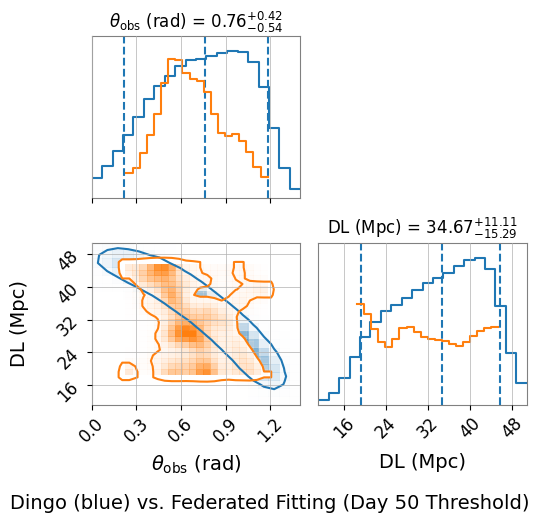

In [43]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from dingo.gw.result import Result

# === Load Dingo samples ===
# dingo_filepath = "/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/ParameterEstimation/examples/octopus/outdir/result/GW170817_data0_1187008882-42_importance_sampling.hdf5"
dingo_filepath = "./GW170817_data0_1187008882-42_importance_sampling.hdf5"

dingo_result = Result(file_name=dingo_filepath)  # Update this path
dingo_samples_df = pd.DataFrame(dingo_result.samples)

# Extract theta_jn and luminosity_distance from Dingo
param_names=["theta_jn", "luminosity_distance"]
samples_dingo = dingo_samples_df[param_names]

# Extract theta_jn and luminosity_distance
theta_jn = samples_dingo["theta_jn"].to_numpy()
luminosity_distance = samples_dingo["luminosity_distance"].to_numpy()

# Convert inclination angle to observation angle
theta_obs = np.pi - theta_jn  # Result is in radians

# Reconstruct samples with theta_obs and luminosity_distance
samples_obs = np.column_stack((theta_obs, luminosity_distance))

samples_dingo = pd.DataFrame(samples_obs, columns=["theta_obs", "luminosity_distance"])
print("dingo shape: ", samples_dingo.shape)


# Check and extract weights
weights = None
use_weights = True
if use_weights and "weights" in dingo_samples_df.columns:
    weights = dingo_samples_df["weights"].to_numpy()
    print("Using importance sampling weights in plot.")


# === Load Federated fitting samples ===
#open up the posteriors:

# pf_samples_filepath = '/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/FederatedFitting/examples/results/pf_8sites_distributed_day50/pf_8sites_distributed_day50_distributed_flat_samples.npy'
# pf_samples_filepath = './GW170817_thetaObs_fromDingo_run4_flat_samples.npy'
pf_samples_filepath = './pf_8sites_distributed_day50_run2/pf_8sites_distributed_day50_distributed_flat_samples.npy'

samples_all_data = np.load(pf_samples_filepath)  # Update this path

params = ['log(E0)',r'$\theta_{obs}$ (rad)','thetaCore','log(n0)','log(eps_e)','log(eps_B)','p', 'thetaWing', 'DL (Mpc)']
# Indices for theta_obs and DL in your federated samples
# Double-check these are the correct indices based on your `params` list
idx_theta_obs = 1  # "$\\theta_{obs}$ (rad)"
idx_dl = 8         # "DL (Mpc)"

# theta_fed = np.degrees(samples_all_data[:, idx_theta_obs])  # convert to degrees if needed
# dl_fed = samples_all_data[:, idx_dl]
# samples_fed = np.vstack([theta_fed, dl_fed]).T

# samples_fed = samples_all_data[0:20000, [idx_theta_obs, idx_dl]]
samples_fed = samples_all_data[:, [idx_theta_obs, idx_dl]]

#Convert obs to invlination angle
# samples_fed[:, 0] += np.pi  # Convert theta_obs to inclination angle

# Extract theta_obs and luminosity_distance columns
# theta_obs = samples_all_data[:, idx_theta_obs]
# luminosity_distance = samples_all_data[:, idx_dl]

# Convert theta_obs to inclination angle (in radians)
# inclination_angle = np.pi - theta_obs

# Combine inclination angle and luminosity_distance into a new array
# samples_fed = np.column_stack((inclination_angle, luminosity_distance))

print("fed shape: ", samples_fed.shape)

# === Plot both together ===
labels = [r"$\theta_{\rm obs}$ (rad)", "DL (Mpc)"]

figsize=(6, 6)  # Width x Height in inches

fig = corner.corner(
    samples_dingo,
    labels=labels,
    weights=weights,
    show_titles=True,
    title_fmt=".2f",
    quantiles=[0.05, 0.5, 0.95],
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    plot_datapoints=False,
    fill_contours=False,
    levels=(0.90,),
    smooth=1.0,
    smooth1d=1.0,
    color='C0',
    figsize=(16, 16),  # 👈 increase from default (~4x4)
    # truths=sub_truths,
    contourf_kwargs={'alpha': 0},  # 👈 suppress fill completely
)

corner.corner(
    samples_fed,
    labels=labels,
    show_titles=False,  # 👈 prevents accidental title overwrite
    fig=fig,  # Use the existing figure
    plot_datapoints=False,
    fill_contours=False,
    levels=(0.90,),
    smooth=1.0,
    smooth1d=1.0,
    color='C1',
    contourf_kwargs={'alpha': 0},  # 👈 again, suppress fill
)

# plt.title("Comparison of Dingo vs Federated Posterior")
fig.suptitle(
    "Dingo (blue) vs. Federated Fitting (Day 50 Threshold)",
    fontsize=14,
    y=0.02  # Move title to bottom
)


plt.tight_layout()
# plt.savefig("comparison_dingo_vs_federated_theta_dl.png")
plt.show()


Why there is a difference between value shown over the histogram in the attached corner plots. When I plot corner plot of dingo samples, it is different. If I plot dingo samples with federate fitting samples, the values are different

# Make Dingo corner plot

change inclination angle to thetaObs 
eliu told to had theta_obs in symbol like above plots

Loading dataset from ./GW170817_data0_1187008882-42_importance_sampling.hdf5.
dingo shape:  (60000, 2)


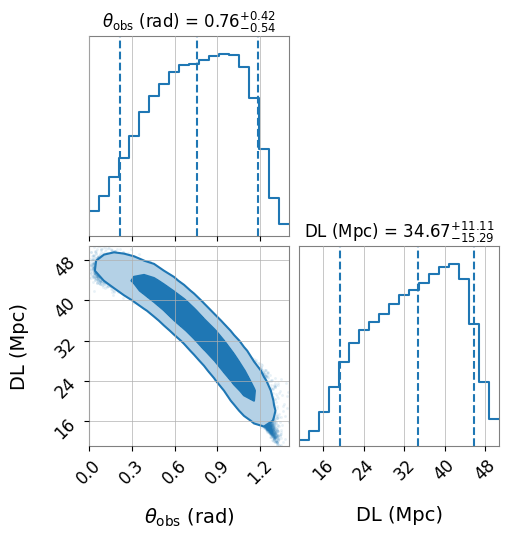

In [6]:
# c) plot corner plot between Distance vs angle

def plot_corner(samples, weights=None, output_path=None, style="custom"):
    """
    Plot a corner plot using the full sample set.

    Args:
        samples (pd.DataFrame): A DataFrame with columns to plot.
        weights (np.ndarray, optional): Optional weights for the samples.
        output_path (str, optional): If provided, saves plot to this path.
        style (str): Either 'custom' or 'dingo' for plot styling.
    """
    
    if style == "dingo":
        corner_params = {
            "smooth": 1.0,
            "smooth1d": 1.0,
            "plot_datapoints": False,
            "plot_density": False,
            "plot_contours": True,
            "levels": [0.5, 0.9],
            "bins": 30,
            "no_fill_contours": True,
        }
    else:
        corner_params = {
            "smooth": 1.0,
            "smooth1d": 1.0,
            "plot_datapoints": True,
            "fill_contours": True,
            "plot_density": True,
            "quantiles": [0.05, 0.5, 0.95],
            "levels": (0.5, 0.9),
            "show_titles": True,
            "title_fmt": ".2f",
            "title_kwargs": {"fontsize": 12},
            "label_kwargs": {"fontsize": 14},
            "figsize": (4, 4)
        }

    labels = [r"$\theta_{\rm obs}$ (rad)", "DL (Mpc)"]

    # labels = [r"Inclination angle (rad)", "DL (Mpc)"]

    fig = corner.corner(
        samples[["theta_obs", "luminosity_distance"]],
        labels=labels,
        weights=weights,
        color='C0',
        **corner_params
    )
    
    if output_path:
        fig.savefig(output_path, bbox_inches='tight', dpi=300)
        print(f"Saved plot to {output_path}")
    else:
        plt.show()

    plt.close()


# === Load Dingo samples ===
# dingo_filepath = "/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/ParameterEstimation/examples/octopus/outdir/result/GW170817_data0_1187008882-42_importance_sampling.hdf5"
dingo_filepath = "./GW170817_data0_1187008882-42_importance_sampling.hdf5"

dingo_result = Result(file_name=dingo_filepath)  # Update this path
dingo_samples_df = pd.DataFrame(dingo_result.samples)

# Extract theta_jn and luminosity_distance from Dingo
param_names=["theta_jn", "luminosity_distance"]
samples_dingo = dingo_samples_df[param_names]

# Extract theta_jn and luminosity_distance
theta_jn = samples_dingo["theta_jn"].to_numpy()
luminosity_distance = samples_dingo["luminosity_distance"].to_numpy()

# Convert inclination angle to observation angle
theta_obs = np.pi - theta_jn  # Result is in radians
# theta_obs = theta_jn  # Result is in radians

# Reconstruct samples with theta_obs and luminosity_distance
samples_obs = np.column_stack((theta_obs, luminosity_distance))

samples_dingo = pd.DataFrame(samples_obs, columns=["theta_obs", "luminosity_distance"])
print("dingo shape: ", samples_dingo.shape)

# Load Dingo weights separately
weights = dingo_samples_df["weights"].to_numpy() if "weights" in dingo_samples_df.columns else None

plot_corner(samples=samples_dingo, weights=weights)

# plot_corner(
#     samples = samples_dingo
# #     param_names=["theta_jn", "luminosity_distance"]
# )


# Plot federated light curve

day threshold "All"

In [ ]:
import pickle
import numpy as np

pf_samples_filepath = './pf_8sites_distributed_dayAll_run2/pf_8sites_distributed_dayAll_distributed_flat_samples.npy'
flat_samples = np.load(pf_samples_filepath)  # Update this path

theta = np.median(flat_samples, axis=0)
print("Median parameter vector (theta):", theta)

data_from_csv = pd.read_csv("/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/FederatedFitting/Kara_files/Makhatini2021_radio_withflags.csv")
if data_from_csv.shape[1] == 1:
    data_from_csv = pd.read_csv("/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/FederatedFitting/Kara_files/Makhatini2021_radio_withflags.csv", delim_whitespace=True)

data = interpret(data_from_csv)
data_UL = interpret_ULs(data_from_csv)

Loading dataset from ./GW170817_data0_1187008882-42_importance_sampling.hdf5.
dingo shape:  (60000, 2)
Using importance sampling weights in plot.
fed shape:  (48000, 2)
quantiles/percentiles shown in histogram: [0.025, 0.5, 0.975]
Levels in corner: (0.68,0.95)


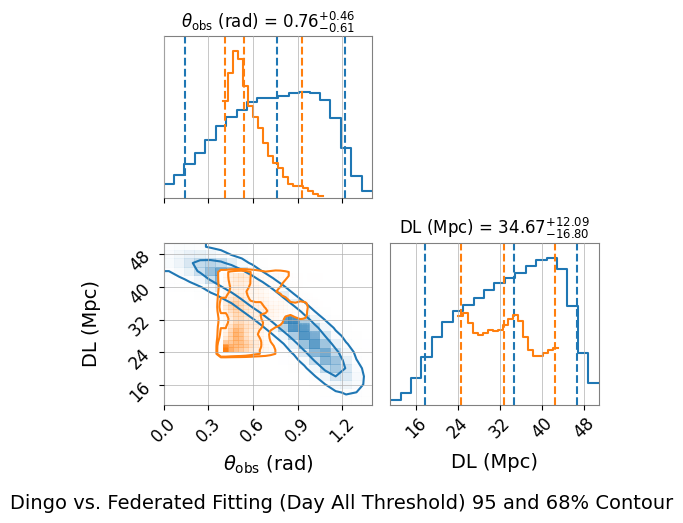

In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from dingo.gw.result import Result

# === Load Dingo samples ===
# dingo_filepath = "/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/ParameterEstimation/examples/octopus/outdir/result/GW170817_data0_1187008882-42_importance_sampling.hdf5"
dingo_filepath = "./GW170817_data0_1187008882-42_importance_sampling.hdf5"

dingo_result = Result(file_name=dingo_filepath)  # Update this path
dingo_samples_df = pd.DataFrame(dingo_result.samples)

# Extract theta_jn and luminosity_distance from Dingo
param_names=["theta_jn", "luminosity_distance"]
samples_dingo = dingo_samples_df[param_names]

# Extract theta_jn and luminosity_distance
theta_jn = samples_dingo["theta_jn"].to_numpy()
luminosity_distance = samples_dingo["luminosity_distance"].to_numpy()

# Convert inclination angle to observation angle
theta_obs = np.pi - theta_jn  # Result is in radians

# Reconstruct samples with theta_obs and luminosity_distance
samples_obs = np.column_stack((theta_obs, luminosity_distance))

samples_dingo = pd.DataFrame(samples_obs, columns=["theta_obs", "luminosity_distance"])
print("dingo shape: ", samples_dingo.shape)


# Check and extract weights
weights = None
use_weights = True
if use_weights and "weights" in dingo_samples_df.columns:
    weights = dingo_samples_df["weights"].to_numpy()
    print("Using importance sampling weights in plot.")

# samples_dingo = samples_dingo[:48000]
# weights = weights[:48000]

# === Load Federated fitting samples ===
#open up the posteriors:

# pf_samples_filepath = '/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/FederatedFitting/examples/results/pf_8sites_distributed_day50/pf_8sites_distributed_day50_distributed_flat_samples.npy'
# pf_samples_filepath = './GW170817_thetaObs_fromDingo_run4_flat_samples.npy'
# pf_samples_filepath = './DL_thetaObs_custom_epsilonthetaCorepfixed_run2/GW170817_DLthetaObs_custom_epsilonthetaCorepfixed_run2_flat_samples.npy'
# pf_samples_filepath = '../Kara_files/DL_thetaObs_Dingo68CI_epsilonthetaCorepfixed_run1/GW170817_DLthetaObs_Dingo68CI_epsilonthetaCorepfixed_run1_flat_samples.npy'
pf_samples_filepath = './results/pf_8sites_distributed_day50_run3/pf_8sites_distributed_day50_run3_distributed_flat_samples.npy'

samples_all_data = np.load(pf_samples_filepath)  # Update this path

params = ['log(E0)',r'$\theta_{obs}$ (rad)','thetaCore','log(n0)','log(eps_e)','log(eps_B)','p', 'thetaWing', 'DL (Mpc)']
# Indices for theta_obs and DL in your federated samples
# Double-check these are the correct indices based on your `params` list
idx_theta_obs = 1  # "$\\theta_{obs}$ (rad)"
idx_dl = 3        # "DL (Mpc)"

# theta_fed = np.degrees(samples_all_data[:, idx_theta_obs])  # convert to degrees if needed
# dl_fed = samples_all_data[:, idx_dl]
# samples_fed = np.vstack([theta_fed, dl_fed]).T

# samples_fed = samples_all_data[0:20000, [idx_theta_obs, idx_dl]]
samples_fed = samples_all_data[:, [idx_theta_obs, idx_dl]]

#Convert obs to invlination angle
# samples_fed[:, 0] += np.pi  # Convert theta_obs to inclination angle

# Extract theta_obs and luminosity_distance columns
# theta_obs = samples_all_data[:, idx_theta_obs]
# luminosity_distance = samples_all_data[:, idx_dl]

# Convert theta_obs to inclination angle (in radians)
# inclination_angle = np.pi - theta_obs

# Combine inclination angle and luminosity_distance into a new array
# samples_fed = np.column_stack((inclination_angle, luminosity_distance))

print("fed shape: ", samples_fed.shape)

# === Plot both together ===
labels = [r"$\theta_{\rm obs}$ (rad)", "DL (Mpc)"]

figsize=(6, 6)  # Width x Height in inches

fig = corner.corner(
    samples_dingo,
    labels=labels,
    weights=weights,
    show_titles=True,
    title_fmt=".2f",
    quantiles=[0.025, 0.5, 0.975],
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    plot_datapoints=False,
    fill_contours=False,
    levels=(0.68,0.95),
    smooth=1.0,
    smooth1d=1.0,
    color='C0',
    figsize=(16, 16),  # 👈 increase from default (~4x4)
    # truths=sub_truths,
    contourf_kwargs={'alpha': 0},  # 👈 suppress fill completely
)

corner.corner(
    samples_fed,
    labels=labels,
    show_titles=False,  # 👈 prevents accidental title overwrite
    fig=fig,  # Use the existing figure
    plot_datapoints=False,
    fill_contours=False,
    quantiles=[0.025, 0.5, 0.975],
    levels=(0.68,0.95),
    smooth=1.0,
    smooth1d=1.0,
    color='C1',
    contourf_kwargs={'alpha': 0},  # 👈 again, suppress fill
)

# plt.title("Comparison of Dingo vs Federated Posterior")
fig.suptitle(
    # "Dingo (blue) vs. Centralized Fitting (Dingo 68% CI)",
    "Dingo vs. Federated Fitting (Day All Threshold) 95 and 68% Contour",
    fontsize=14,
    y=0.02  # Move title to bottom
)

print("quantiles/percentiles shown in histogram: [0.025, 0.5, 0.975]")
print("Levels in corner: (0.68,0.95)")

plt.tight_layout()
# plt.savefig("comparison_dingo_vs_federated_theta_dl.png")
plt.show()


# Dingo 68% interval for afterglowpy

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from dingo.gw.result import Result

# === Load Dingo samples ===
# dingo_filepath = "/lus/eagle/projects/RAPINS/parth/MMA_RadioWave/ParameterEstimation/examples/octopus/outdir/result/GW170817_data0_1187008882-42_importance_sampling.hdf5"
dingo_filepath = "./GW170817_data0_1187008882-42_importance_sampling.hdf5"

dingo_result = Result(file_name=dingo_filepath)  # Update this path
dingo_samples_df = pd.DataFrame(dingo_result.samples)

# Extract theta_jn and luminosity_distance from Dingo
param_names=["theta_jn", "luminosity_distance"]
samples_dingo = dingo_samples_df[param_names]

# Compute summary statistics for Dingo samples
for param in ["theta_jn", "luminosity_distance"]:
    values = samples_dingo[param].to_numpy()

    if weights is not None:
        # Use weighted quantiles
        from numpy import percentile

        def weighted_percentile(data, weights, percentiles):
            data, weights = np.array(data), np.array(weights)
            sorter = np.argsort(data)
            data, weights = data[sorter], weights[sorter]
            cumsum = np.cumsum(weights)
            normed_cumsum = 100 * cumsum / cumsum[-1]
            return np.interp(percentiles, normed_cumsum, data)

        q16, q50, q84 = weighted_percentile(values, weights, [16, 50, 84])
    else:
        # Unweighted quantiles
        q16, q50, q84 = np.percentile(values, [16, 50, 84])

    print(f"{param}: median = {q50:.3f}, 68% CI = [{q16:.3f}, {q84:.3f}]")


Loading dataset from ./GW170817_data0_1187008882-42_importance_sampling.hdf5.
theta_jn: median = 2.382, 68% CI = [2.069, 2.741]
luminosity_distance: median = 34.667, 68% CI = [24.079, 43.153]


In [9]:
import numpy as np

theta_jn_median = 2.382
theta_jn_q16 = 2.069
theta_jn_q84 = 2.741

theta_obs_median = np.pi - theta_jn_median
theta_obs_q16 = np.pi - theta_jn_q84  # Note: q16 maps to upper bound after flipping
theta_obs_q84 = np.pi - theta_jn_q16

print(f"theta_obs: median = {theta_obs_median:.3f}, 68% CI = [{theta_obs_q16:.3f}, {theta_obs_q84:.3f}]")

theta_obs: median = 0.760, 68% CI = [0.401, 1.073]


# Overlapping plot with federated fitting day "All"

using Kara styling

Loading dataset from ./GW170817_data0_1187008882-42_importance_sampling.hdf5.
dingo shape: (60000, 2)
fed shape: (48000, 2)


/tmp/ipykernel_1271693/88274769.py:55: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, zz, levels=[level_68], colors=[color], linewidths=1.5, linestyles=ls, alpha=0.9, label=name)


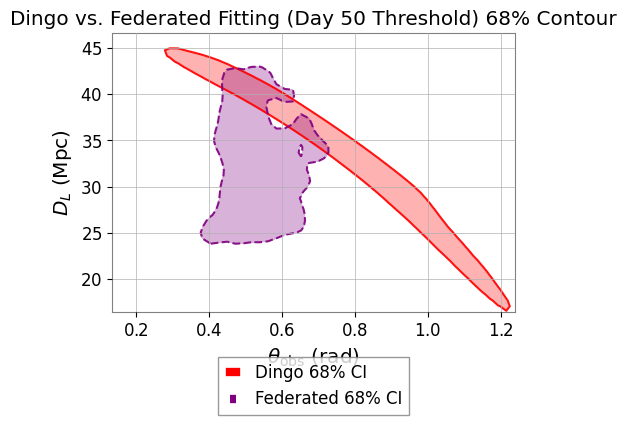

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde
from dingo.gw.result import Result

# === Load Dingo samples ===
dingo_filepath = "./GW170817_data0_1187008882-42_importance_sampling.hdf5"
dingo_result = Result(file_name=dingo_filepath)
dingo_samples_df = pd.DataFrame(dingo_result.samples)

# Extract parameters and convert theta_jn to theta_obs
theta_jn = dingo_samples_df["theta_jn"].to_numpy()
luminosity_distance = dingo_samples_df["luminosity_distance"].to_numpy()
theta_obs = np.pi - theta_jn  # Convert to observation angle

samples_dingo = np.column_stack((theta_obs, luminosity_distance))
weights = dingo_samples_df["weights"].to_numpy() if "weights" in dingo_samples_df.columns else None
print("dingo shape:", samples_dingo.shape)

# === Load Federated fitting samples ===
# pf_samples_filepath = './results/DL_thetaObs_Dingo68CI_epsilonthetaCorepfixed_run1/GW170817_DLthetaObs_Dingo68CI_epsilonthetaCorepfixed_run1_flat_samples.npy'
pf_samples_filepath = './results/pf_8sites_distributed_day50_run3/pf_8sites_distributed_day50_run3_distributed_flat_samples.npy'

samples_all_data = np.load(pf_samples_filepath)

idx_theta_obs = 1  # θ_obs index
idx_dl = 3         # DL index
samples_fed = samples_all_data[:, [idx_theta_obs, idx_dl]]
print("fed shape:", samples_fed.shape)

# === Plot using filled contours ===
def plot_filled_kde(samples_list, names, colors, linestyles, title, meshgrid_number=50):
    samples_list = [np.array(s) for s in samples_list]
    all_theta = np.concatenate([s[:, 0] for s in samples_list])
    all_dl = np.concatenate([s[:, 1] for s in samples_list])

    xmin, xmax = np.percentile(all_theta, [1, 99])
    ymin, ymax = np.percentile(all_dl, [1, 99])
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, meshgrid_number), np.linspace(ymin, ymax, meshgrid_number))
    pos = np.vstack([xx.ravel(), yy.ravel()])

    fig, ax = plt.subplots(figsize=(5, 4))
    for s, name, color, ls in zip(samples_list, names, colors, linestyles):
        kde = gaussian_kde(s.T)
        zz = kde(pos).reshape(xx.shape)

        # Find the value of the KDE that encloses 68% CI of the probability
        z_sorted = np.sort(zz.ravel())[::-1]
        cumsum = np.cumsum(z_sorted) / np.sum(z_sorted)
        level_68 = z_sorted[np.searchsorted(cumsum, 0.68)]

        ax.contourf(xx, yy, zz, levels=[level_68, zz.max()], colors=[color], alpha=0.3)
        ax.contour(xx, yy, zz, levels=[level_68], colors=[color], linewidths=1.5, linestyles=ls, alpha=0.9, label=name)

    ax.set_xlabel(r"$\theta_{\rm obs}$ (rad)")
    ax.set_ylabel(r"$D_L$ (Mpc)")
    ax.set_title(title)

    legend_lines = [Line2D([0], [0], color=color, lw=2, linestyle=ls, label=name)
                    for name, color, ls in zip(names, colors, linestyles)]
    ax.legend(handles=legend_lines, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    plt.show()

# === Call plot ===
plot_filled_kde(
    samples_list=[samples_dingo, samples_fed],
    # names=[
    #     r'Dingo 68% CI: $0.401 < \theta_{\rm obs} < 1.073$, $24.079 < D_L < 43.153$',
    #      r'Federated 68% CI: $0.510 < \theta_{\rm obs} < 0.541$, $26.97 < D_L < 39.76$'
    # ],

    names=[
        r'Dingo 68% CI',
         r'Federated 68% CI'
    ],
    colors=['red', 'purple'],
    linestyles=['-', '--'],
    title='Dingo vs. Federated Fitting (Day 50 Threshold) 68% Contour'
)
